In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from library.sb_utils import save_file

In [2]:
#Define functions to plot the cdf of features

def cdf(x, plot=True,ylab='CDF', *args, **kwargs):
    x, y = sorted(x), np.arange(len(x)) / len(x)
    return plt.plot(x, y, *args, **kwargs)  if plot else (x, y), plt.ylabel('CDF')

#Function to plot both CDF

def both_cdf(fraud,normal):
    plt.title('CDF Distribution Of '+format(fraud.name))
    plt.xlabel('Amount')
    return cdf(fraud,c='r',label='fraud'),cdf(normal,c='k',label='normal'),plt.legend()
    

In [3]:
#load the data

df= pd.read_csv('Cleaned.csv')
df.head()

,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,Incorrect CVV Entered
0,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,2,1,rideshare,06/2023,2015-03-14,2015-03-14,1803,PURCHASE,0.0,0,0,0,0
1,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,9,1,entertainment,02/2024,2015-03-14,2015-03-14,767,PURCHASE,0.0,1,0,0,0
2,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,9,1,mobileapps,08/2025,2015-03-14,2015-03-14,767,PURCHASE,0.0,0,0,0,0
3,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,9,1,mobileapps,08/2025,2015-03-14,2015-03-14,767,PURCHASE,0.0,0,0,0,0
4,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,2,1,fastfood,10/2029,2015-08-06,2015-08-06,3143,PURCHASE,0.0,1,0,0,0


In [4]:
#The Dtypes are wrong in quite a few features

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776613 entries, 0 to 776612
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   customerId                776613 non-null  int64  
 1   creditLimit               776613 non-null  int64  
 2   availableMoney            776613 non-null  float64
 3   transactionDateTime       776613 non-null  object 
 4   transactionAmount         776613 non-null  float64
 5   merchantName              776613 non-null  object 
 6   acqCountry                776613 non-null  object 
 7   posEntryMode              776613 non-null  int64  
 8   posConditionCode          776613 non-null  int64  
 9   merchantCategoryCode      776613 non-null  object 
 10  currentExpDate            776613 non-null  object 
 11  accountOpenDate           776613 non-null  object 
 12  dateOfLastAddressChange   776613 non-null  object 
 13  cardLast4Digits           776613 non-null  i

In [5]:
#Correct dtypes

#These should be objects
df[['customerId','creditLimit','posEntryMode','posConditionCode','cardLast4Digits']]=df[['customerId','creditLimit','posEntryMode','posConditionCode','cardLast4Digits']].astype('O')


#These should be datetime
dates = ['transactionDateTime','currentExpDate','accountOpenDate','dateOfLastAddressChange']

for i in dates:
    df[i]=pd.to_datetime(df[i])


In [6]:
#Change order of columns for a better understanding of the whole dataframe

df = df[['customerId','transactionDateTime','transactionType','cardLast4Digits','creditLimit','availableMoney', 'transactionAmount','currentBalance','merchantName', 'merchantCategoryCode','acqCountry', 'posEntryMode','posConditionCode','accountOpenDate','dateOfLastAddressChange','currentExpDate','cardPresent','expirationDateKeyInMatch', 'Incorrect CVV Entered', 'isFraud']]

df.head()

,customerId,transactionDateTime,transactionType,cardLast4Digits,creditLimit,availableMoney,transactionAmount,currentBalance,merchantName,merchantCategoryCode,acqCountry,posEntryMode,posConditionCode,accountOpenDate,dateOfLastAddressChange,currentExpDate,cardPresent,expirationDateKeyInMatch,Incorrect CVV Entered,isFraud
0,737265056,2016-08-13 14:27:32,PURCHASE,1803,5000,5000.0,98.55,0.0,Uber,rideshare,US,2,1,2015-03-14,2015-03-14,2023-06-01,0,0,0,0
1,737265056,2016-10-11 05:05:54,PURCHASE,767,5000,5000.0,74.51,0.0,AMC #191138,entertainment,US,9,1,2015-03-14,2015-03-14,2024-02-01,1,0,0,0
2,737265056,2016-11-08 09:18:39,PURCHASE,767,5000,5000.0,7.47,0.0,Play Store,mobileapps,US,9,1,2015-03-14,2015-03-14,2025-08-01,0,0,0,0
3,737265056,2016-12-10 02:14:50,PURCHASE,767,5000,5000.0,7.47,0.0,Play Store,mobileapps,US,9,1,2015-03-14,2015-03-14,2025-08-01,0,0,0,0
4,830329091,2016-03-24 21:04:46,PURCHASE,3143,5000,5000.0,71.18,0.0,Tim Hortons #947751,fastfood,US,2,1,2015-08-06,2015-08-06,2029-10-01,1,0,0,0


With so many object features and very few numeric features, not a lot of correlation between features can be seen imediately. Much feature engineering is going to be required to gain some useful insights into this dataset.

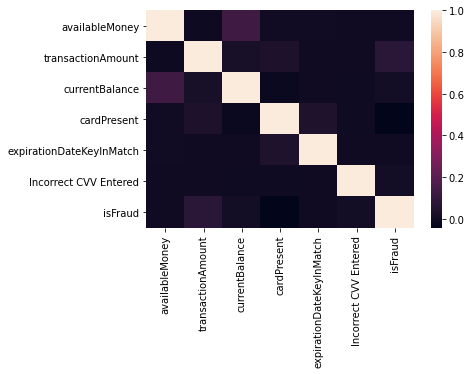

In [7]:
sns.heatmap(df.corr())

To detect fraud, we must segment by customers and explore their behaviors.

# CustomerId

Looking at customerId, the average of fraud per customer is about 3% while there is at least one where 100% of the transactions were fraud. That must be an outlier.

In [8]:
per_person = {}
rates = []

for cust in df.customerId.unique():
    All = df[df.customerId==cust]
    fraud_transactions = All[All.isFraud==1]
    rate_of_fraud = len(fraud_transactions)/len(All)*100
    per_person[cust]=rate_of_fraud
    if rate_of_fraud>0:
        rates.append(rate_of_fraud)
        
print('Average fraud per customer: '+format(np.mean(rates)))
print('Max fraud per customer: '+format(np.max(rates)))

Average fraud per customer: 2.948826422987029
Max fraud per customer: 100.0


Set a threshold to where if a customer has more than 30% of their transactions as fraud, drop them from the data set.

In [9]:
threshold = 30   #percent

print('before drop: ',df.shape)

for ID,rate in per_person.items():
    if rate > threshold:
        df.drop(df[df.customerId==ID].index,inplace=True)

df=df.reset_index().drop(columns='index')

print('after dropping: ',df.shape)

before drop:  (776613, 20)
after dropping:  (776491, 20)


# Seperate into fraud and normal transactions

In [10]:
fraud=df[df.isFraud==1]
norm = df[df.isFraud==0]

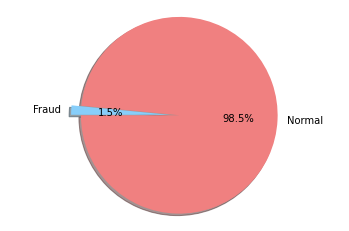

In [11]:
#This is a highly imbalanced data set

labels = 'Normal','Fraud'
sizes = [len(norm),len(fraud)]
colors = ['lightcoral', 'lightskyblue']
explode = (0, 0.1) 

plt.pie(sizes, explode=explode, labels=labels,colors = colors,
autopct='%1.1f%%', shadow=True, startangle=180)

plt.axis('equal')
plt.show()

# Transaction Date Time

With the available transactionDateTime feature, we are going to create some more useful features out of it.

In [12]:
df['month'] = df.transactionDateTime.dt.month
df['day_of_month'] = df.transactionDateTime.dt.day
df['begin_of_month'] = (df.day_of_month<10).astype('uint8')
df['middle_of_month'] = ((df.day_of_month >= 10)&(df.day_of_month < 20)).astype('uint8')
df['end_of_month'] = (df.day_of_month >=20).astype('uint8')
df['day_of_week'] = df.transactionDateTime.dt.day_name()
df['hour'] = df.transactionDateTime.dt.hour
df['morning'] = df.hour.map(lambda x:1 if (x<=11)&(x>=7) else 0).astype('uint8')
df['day'] = df.hour.map(lambda x:1 if (x>=12)&(x<=18) else 0).astype('uint8')
df['evening'] = df.hour.map(lambda x:1 if (x>=19)&(x<=23) else 0).astype('uint8')
df['night'] = df.hour.map(lambda x:1 if (x>=0)&(x<=6) else 0).astype('uint8')
df['weekday'] = df.day_of_week.map(lambda x:1 if x in ['Monday','Tuesday','Wednesday','Thursday'] else 0)
df['weekend'] = df.day_of_week.map(lambda x:1 if x in ['Friday','Saturday','Sunday'] else 0)


#

conditions = [
    (df['hour'] <= 11) & (df['hour'] >= 7),
    (df['hour'] >=12) & (df['hour'] <=18),
    (df['hour'] >=19) & (df['hour'] <=23),
    (df['hour'] >=0) & (df['hour'] <=6)
    ]

values =['morning','day','evening','night']

df['time_of_day'] = np.select(conditions,values)

#

conditions2 = [
    (df.day_of_month<10),
    ((df.day_of_month >= 10)&(df.day_of_month < 20)),
    (df.day_of_month >=20)
]

values2 = ['beginning','middle','end']


df['time_of_month'] = np.select(conditions2,values2)


In [13]:
#Add feature stating if transaction occured on a US holiday or not

from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

dr = pd.date_range(start=min(df.transactionDateTime), end=max(df.transactionDateTime))

cal = calendar()
holidays = cal.holidays(start=dr.min(), end=dr.max())

df['holiday'] = df.transactionDateTime.dt.date.astype('datetime64').isin(holidays).replace([True,False],[1,0])

In [14]:
#update fraud and normal 

fraud=df[df.isFraud==1]
norm = df[df.isFraud==0]

It appears like there are a lot less fraud occuring towards the end of the month, but that might be because not all months have 31 days  

Fraud activity also seems to peak certain times throughout the month.

C:\Users\vtou2\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vtou2\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


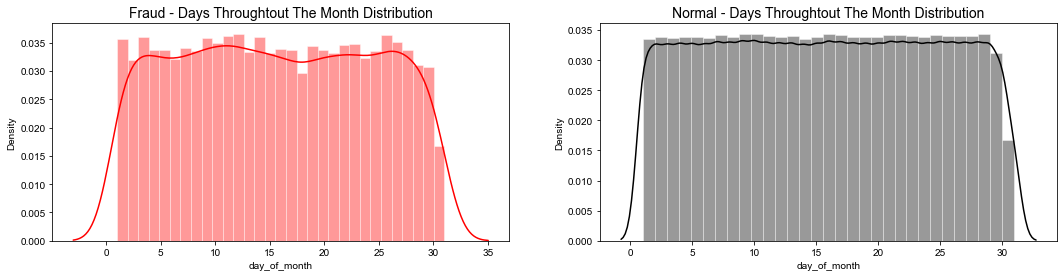

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))
sns.set_style("whitegrid")


sns.distplot(fraud.day_of_month, ax=ax[0], color='r',bins=31)
ax[0].set_title('Fraud - Days Throughtout The Month Distribution', fontsize=14)

sns.distplot(norm.day_of_month, ax=ax[1], color='k',bins=31)
ax[1].set_title('Normal - Days Throughtout The Month Distribution', fontsize=14)

plt.show()

(([<matplotlib.lines.Line2D at 0x17d300ccd60>], Text(0, 0.5, 'CDF')),
 ([<matplotlib.lines.Line2D at 0x17d300f2040>], Text(0, 0.5, 'CDF')),
 <matplotlib.legend.Legend at 0x17d300c1160>)

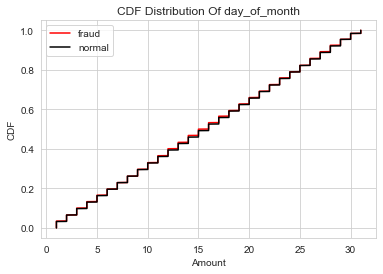

In [16]:
#The cdf itself doesn't show much variance

both_cdf(fraud.day_of_month,norm.day_of_month)

While Friday has the most occurances in both fraud and non-fraudulent activites, fraud transactions occur slightly more on Monday than the rest of the other days (besides Friday)

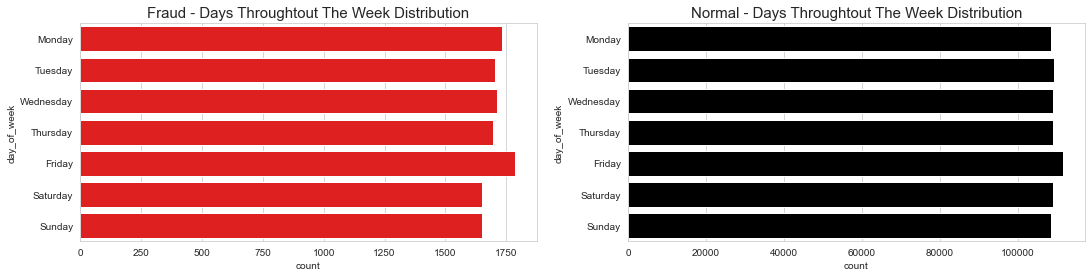

In [17]:
days=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

fig, ax = plt.subplots(1, 2, figsize=(18,4))
sns.set_style("whitegrid")

sns.countplot(y=fraud.day_of_week,ax=ax[0],order = days,orient='h',color='r')
ax[0].set_title('Fraud - Days Throughtout The Week Distribution', fontsize=15)

sns.countplot(y=norm.day_of_week,ax=ax[1],order = days,orient='h',color='k')
ax[1].set_title('Normal - Days Throughtout The Week Distribution', fontsize=15)

plt.show()

The normal transaction are pretty similar throughout the day, but fraudulent activites occur 
mostly at noon then drops quite a bit at nighttime with a few peaks overnight

C:\Users\vtou2\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vtou2\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


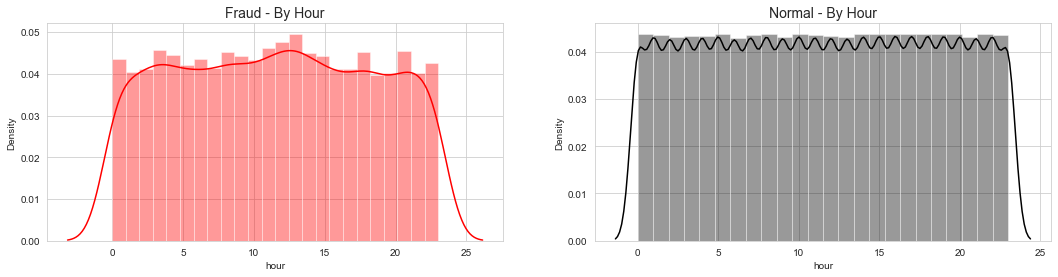

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))
sns.set_style("whitegrid")


sns.distplot(fraud.hour,bins=len(fraud.hour.unique()),ax=ax[0], color='r')
ax[0].set_title('Fraud - By Hour', fontsize=14)

sns.distplot(norm.hour,bins=len(norm.hour.unique()),ax=ax[1], color='k')
ax[1].set_title('Normal - By Hour', fontsize=14)

plt.show()

(([<matplotlib.lines.Line2D at 0x17d241acf10>], Text(0, 0.5, 'CDF')),
 ([<matplotlib.lines.Line2D at 0x17d241b51c0>], Text(0, 0.5, 'CDF')),
 <matplotlib.legend.Legend at 0x17d2feb4d60>)

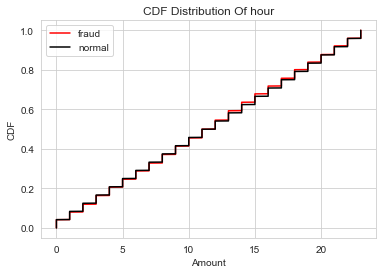

In [19]:
both_cdf(fraud.hour,norm.hour)

<ipython-input-20-cbb6738e3289>:11: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(sizes,  labels=labels,
<ipython-input-20-cbb6738e3289>:23: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(sizes2,labels=labels,


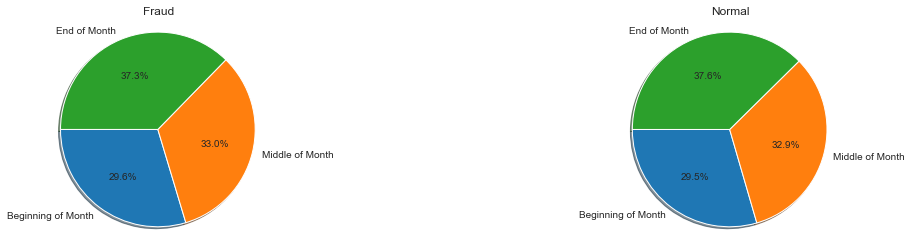

In [20]:
#Distribution by different parts of the month


plt.subplot(1,3,1)


labels = 'Beginning of Month','Middle of Month','End of Month'
sizes= [np.array([fraud.begin_of_month.sum(),fraud.middle_of_month.sum(),fraud.end_of_month.sum()])]


plt.pie(sizes,  labels=labels,
autopct='%1.1f%%', shadow=True, startangle=180)

plt.title('Fraud')
plt.axis('equal')

plt.subplot(1,3,3)


sizes2= [np.array([norm.begin_of_month.sum(),norm.middle_of_month.sum(),norm.end_of_month.sum()])]


plt.pie(sizes2,labels=labels,
autopct='%1.1f%%', shadow=True, startangle=180)

plt.title('Normal')
plt.axis('equal')

plt.subplots_adjust(right=2)

plt.show()

<ipython-input-21-d43abc15f6be>:10: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(sizes, labels=labels,
<ipython-input-21-d43abc15f6be>:21: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(sizes2, labels=labels,


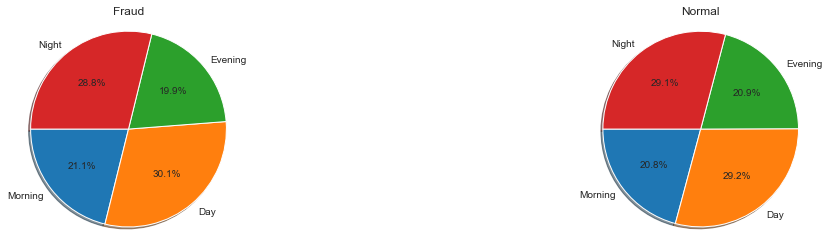

In [21]:
#Distribution by different parts of the day

plt.subplot(1,3,1)


labels = 'Morning','Day','Evening','Night'
sizes= [np.array([fraud.morning.sum(),fraud.day.sum(),fraud.evening.sum(),fraud.night.sum()])]
explode = (0, 0.1,0.0,0) 

plt.pie(sizes, labels=labels,
autopct='%1.1f%%', shadow=True, startangle=180)

plt.title('Fraud')
plt.axis('equal')

plt.subplot(1,3,3)

sizes2= [np.array([norm.morning.sum(),norm.day.sum(),norm.evening.sum(),norm.night.sum()])]


plt.pie(sizes2, labels=labels,
autopct='%1.1f%%', shadow=True, startangle=180)

plt.title('Normal')
plt.axis('equal')

plt.subplots_adjust(right=2)

plt.show()

<ipython-input-22-1bab161bda23>:10: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(sizes,  labels=labels,
<ipython-input-22-1bab161bda23>:21: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(sizes2,  labels=labels,


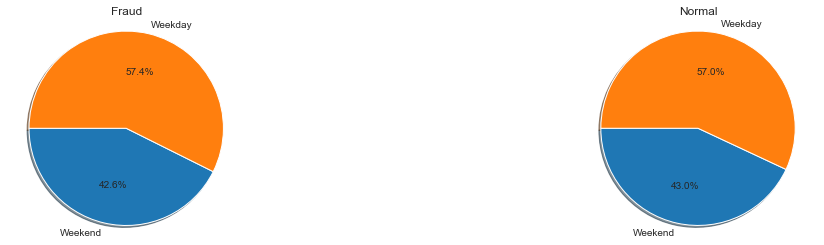

In [22]:
#Distribution by weekend or weekday

plt.subplot(1,3,1)


labels = 'Weekend','Weekday'
sizes= [np.array([fraud.weekend.sum(),fraud.weekday.sum()])]


plt.pie(sizes,  labels=labels,
autopct='%1.1f%%', shadow=True, startangle=180)

plt.title('Fraud')
plt.axis('equal')

plt.subplot(1,3,3)

sizes2= [np.array([norm.weekend.sum(),norm.weekday.sum()])]


plt.pie(sizes2,  labels=labels,
autopct='%1.1f%%', shadow=True, startangle=180)

plt.title('Normal')
plt.axis('equal')

plt.subplots_adjust(right=2)

plt.show()

Time affects fraudulent activity, so lets create a new feature for the time since each transaction based on the customerId

In [23]:
df['time_since_last_transaction']=df.groupby(['customerId'])['transactionDateTime'].diff(1).fillna(pd.Timedelta(seconds=0))

#Convert time into total seconds

df['time_since_last_transaction'] = df['time_since_last_transaction'].dt.total_seconds()

There is quite a bit of difference from this one feature

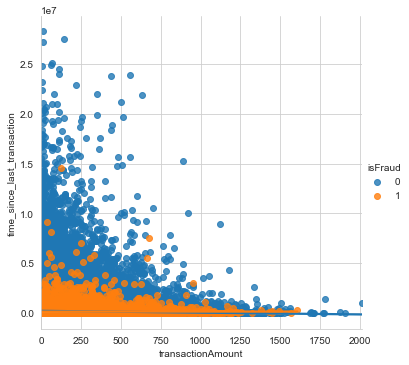

In [24]:
sns.lmplot(data=df, x='transactionAmount',y='time_since_last_transaction',hue='isFraud')
plt.show()

# Transaction Type

Fraud transactions have more purchases and less reversal types. Adress verification is pretty much the same

<ipython-input-25-7d9a7eb42167>:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(sizes, explode=explode, labels=labels,


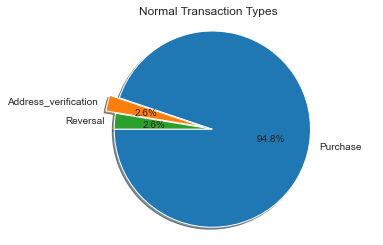

In [25]:
#Distribution of transactionType in norm

labels = 'Purchase','Address_verification','Reversal'
sizes = [(norm.transactionType.value_counts()/len(norm)*100).values]
explode = (0, 0.1,0.0) 


plt.pie(sizes, explode=explode, labels=labels,
autopct='%1.1f%%', shadow=True, startangle=180)

plt.title('Normal Transaction Types')
plt.axis('equal')
plt.show()

<ipython-input-26-4dc7eb7525aa>:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(sizes, explode=explode, labels=labels,


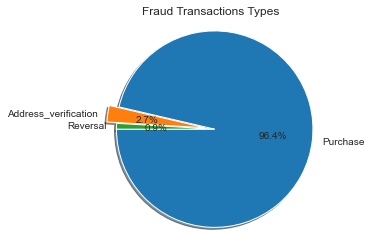

In [26]:
##Distribution of transactionType in fraud

labels = 'Purchase','Address_verification','Reversal'
sizes= [(fraud.transactionType.value_counts()/len(fraud)*100).values]
explode = (0, 0.1,0.0) 

plt.pie(sizes, explode=explode, labels=labels,
autopct='%1.1f%%', shadow=True, startangle=180)

plt.title('Fraud Transactions Types')
plt.axis('equal')
plt.show()

# Credit Limit

Credit Limits have some differences

(([<matplotlib.lines.Line2D at 0x17d3006ed30>], Text(0, 0.5, 'CDF')),
 ([<matplotlib.lines.Line2D at 0x17d3e3a68e0>], Text(0, 0.5, 'CDF')),
 <matplotlib.legend.Legend at 0x17d2fe30070>)

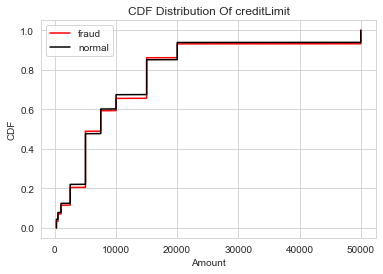

In [27]:
both_cdf(fraud.creditLimit,norm.creditLimit)

C:\Users\vtou2\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vtou2\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


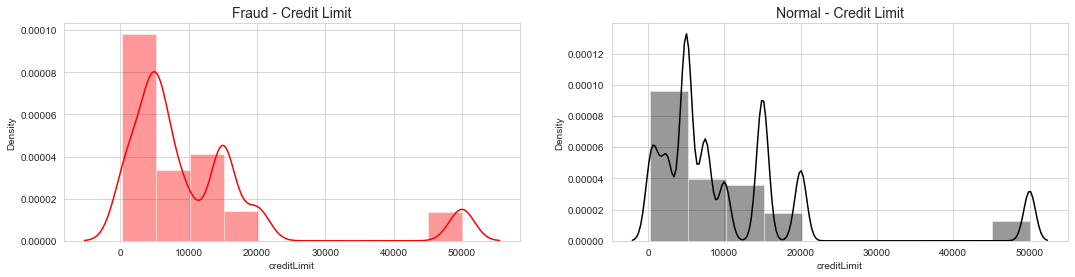

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))
sns.set_style("whitegrid")


sns.distplot(fraud.creditLimit,bins=len(fraud.creditLimit.unique()),ax=ax[0], color='r')
ax[0].set_title('Fraud - Credit Limit', fontsize=14)

sns.distplot(norm.creditLimit,bins=len(norm.creditLimit.unique()),ax=ax[1], color='k')
ax[1].set_title('Normal - Credit Limit', fontsize=14)

plt.show()

# Available Money

Available Money doesn't seem to differ too much from each other

(([<matplotlib.lines.Line2D at 0x17d2ffa7df0>], Text(0, 0.5, 'CDF')),
 ([<matplotlib.lines.Line2D at 0x17d2ffa7fa0>], Text(0, 0.5, 'CDF')),
 <matplotlib.legend.Legend at 0x17d4258e430>)

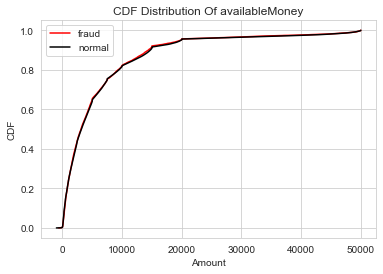

In [29]:
both_cdf(fraud.availableMoney,norm.availableMoney)

C:\Users\vtou2\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vtou2\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


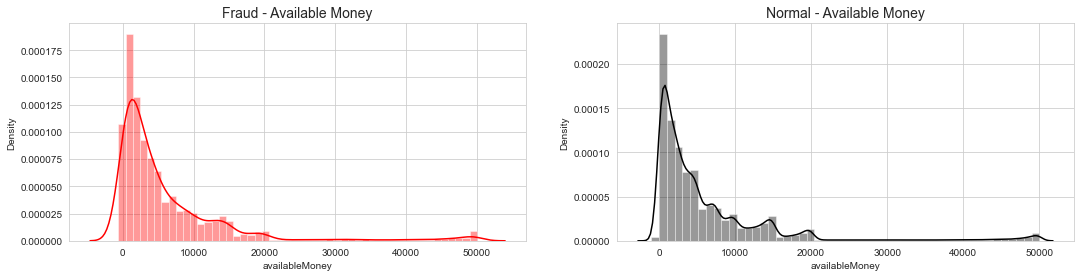

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))
sns.set_style("whitegrid")


sns.distplot(fraud.availableMoney,ax=ax[0], color='r')
ax[0].set_title('Fraud - Available Money', fontsize=14)

sns.distplot(norm.availableMoney,ax=ax[1], color='k')
ax[1].set_title('Normal - Available Money', fontsize=14)

plt.show()

availableMoney seems to be the amount left after each previous transaction.  Yet there there are some rows that does not change even after being used mutilple times.  More information might be needed to better interpret this.  For now, available money does not seem to affect the outcome of fraud or not.  Keeping it for now, but may drop later if it doesn't help much during model. 

In [31]:
df[['customerId','availableMoney','transactionAmount','isFraud']]

,customerId,availableMoney,transactionAmount,isFraud
0,737265056,5000.00,98.55,0
1,737265056,5000.00,74.51,0
2,737265056,5000.00,7.47,0
3,737265056,5000.00,7.47,0
4,830329091,5000.00,71.18,0
...,...,...,...,...
776486,732852505,48904.96,119.92,0
776487,732852505,48785.04,18.89,0
776488,732852505,48766.15,49.43,0
776489,732852505,48716.72,49.89,0


# Transaction Amount

Transaction Amount is showing the biggest variance between fraud and normal activities

(([<matplotlib.lines.Line2D at 0x17d3e2d7040>], Text(0, 0.5, 'CDF')),
 ([<matplotlib.lines.Line2D at 0x17d3e2d7f10>], Text(0, 0.5, 'CDF')),
 <matplotlib.legend.Legend at 0x17d300f9280>)

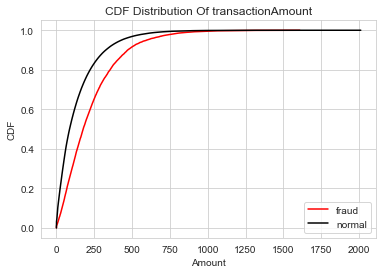

In [32]:
#Fraud transaction seems to be occuring at higher amounts than normal

both_cdf(fraud.transactionAmount,norm.transactionAmount)

C:\Users\vtou2\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vtou2\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


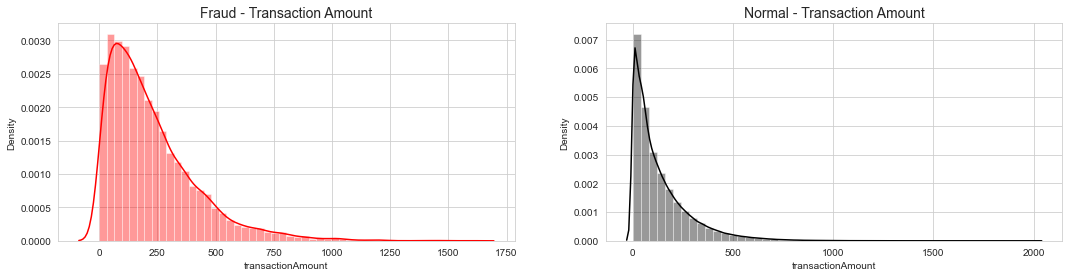

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))
sns.set_style("whitegrid")


sns.distplot(fraud.transactionAmount,ax=ax[0], color='r')
ax[0].set_title('Fraud - Transaction Amount', fontsize=14)

sns.distplot(norm.transactionAmount,ax=ax[1], color='k')
ax[1].set_title('Normal - Transaction Amount', fontsize=14)

plt.show()

Create new feature for finding the amount of difference since the last transaction

In [34]:
#find the time difference between the row before it
df['differ_from_last_transaction_amount']=df.groupby(['customerId'])['transactionAmount'].diff(1).fillna(0)

In [35]:
#Update fraud and normal data

fraud=df[df.isFraud==1]
norm=df[df.isFraud==0]

(([<matplotlib.lines.Line2D at 0x17d48a1dbb0>], Text(0, 0.5, 'CDF')),
 ([<matplotlib.lines.Line2D at 0x17d48a1d190>], Text(0, 0.5, 'CDF')),
 <matplotlib.legend.Legend at 0x17d48a9edf0>)

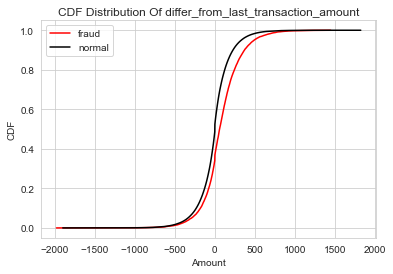

In [36]:
both_cdf(fraud.differ_from_last_transaction_amount,norm.differ_from_last_transaction_amount)

C:\Users\vtou2\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vtou2\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


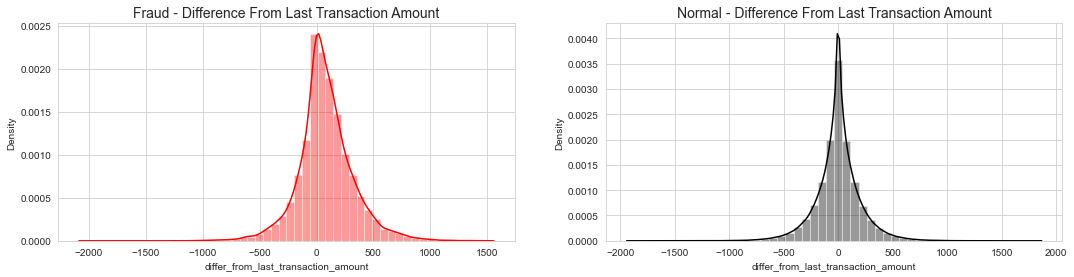

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))
sns.set_style("whitegrid")


sns.distplot(fraud.differ_from_last_transaction_amount,ax=ax[0], color='r')
ax[0].set_title('Fraud - Difference From Last Transaction Amount', fontsize=14)

sns.distplot(norm.differ_from_last_transaction_amount,ax=ax[1], color='k')
ax[1].set_title('Normal - Difference From Last Transaction Amount', fontsize=14)

plt.show()

Create new feature for the transactionAmount average of each customer monthly, based on the merchantName

In [38]:
df['transactionAmt_avg'] = df.groupby(['customerId','cardLast4Digits','month','merchantName'])['transactionAmount'].transform('mean')
df['avg_diff'] = df['transactionAmount']-df['transactionAmt_avg']

# Current Balance

The current balance of fraud and normal transactions are almost identical, but fraud transaction in general have a larger current balance

(([<matplotlib.lines.Line2D at 0x17d30017400>], Text(0, 0.5, 'CDF')),
 ([<matplotlib.lines.Line2D at 0x17d2fff65e0>], Text(0, 0.5, 'CDF')),
 <matplotlib.legend.Legend at 0x17d3e327cd0>)

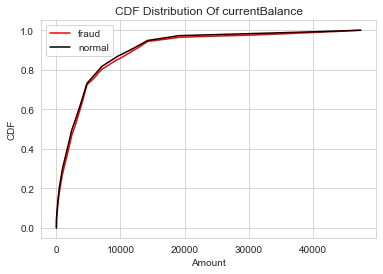

In [39]:
both_cdf(fraud.currentBalance,norm.currentBalance)

C:\Users\vtou2\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vtou2\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


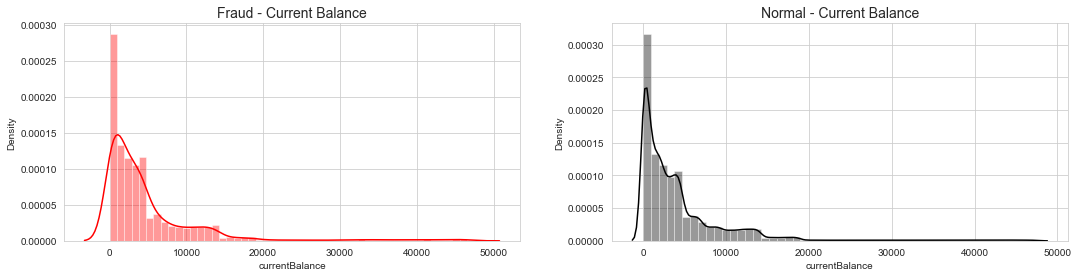

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))
sns.set_style("whitegrid")


sns.distplot(fraud.currentBalance,ax=ax[0], color='r')
ax[0].set_title('Fraud - Current Balance', fontsize=14)

sns.distplot(norm.currentBalance,ax=ax[1], color='k')
ax[1].set_title('Normal - Current Balance', fontsize=14)

plt.show()

# Merchant Name

Uber, Lyft and lots of websites sees the most amount of transactions

But with so many merchant names, which ones have more fraud?

In [41]:
print('length of unique merchant names: '+format(len(df.merchantName.unique())))

length of unique merchant names: 2489


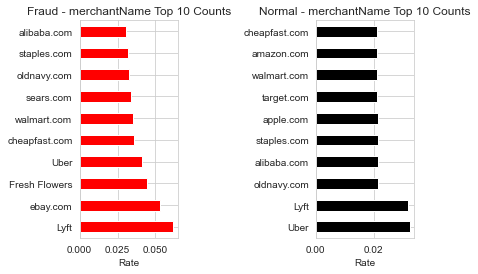

In [42]:
plt.subplot(1,3,1)

fraud.merchantName.value_counts(normalize=True).head(10).plot(kind='barh',color='r')
plt.xlabel('Rate')
plt.title('Fraud - merchantName Top 10 Counts')

plt.subplot(1,3,3)

norm.merchantName.value_counts(normalize=True).head(10).plot(kind='barh',color='k')
plt.xlabel('Rate')
plt.title('Normal - merchantName Top 10 Counts')



plt.show()

There are some differences between normal and fraudulent transactions between merchantNames

- Lyft has the most fraud, but that seems normal as it also sees the most amount of transactions
- ebay.com, Fresh Flowers and walmart.com has a surprisingly high percentage of fraud whereas they don't even appear in the top 10 or normal transactions but appear as second,third and sixth most counts of fraud
- All other features occur between each type   


Lets investigate further and see the ratio of fraud towards each merchantName

In [43]:
fraud_merchant_ratio = fraud.merchantName.value_counts()/df.merchantName.value_counts()*100

fraud_merchant_ratio.to_frame().reset_index().sort_values(by='merchantName',ascending=False).rename(columns={'index':'merchantName','merchantName':'percent'}).head(20)

,merchantName,percent
918,In-N-Out #949129,10.227273
914,In-N-Out #863086,9.473684
41,American Airlines,9.429682
2287,Walgreens #475572,7.407407
885,In-N-Out #422833,7.407407
887,In-N-Out #463194,7.368421
870,In-N-Out #17755,6.862745
891,In-N-Out #567597,6.818182
916,In-N-Out #899468,6.603774
597,Fresh Flowers,6.430829


In-N-Out consistantly remain at the top, as well as other locations with a # followed by some number.\
The # followed by numbers is probably the specific store, and although 10% of all transaction happening at that location are  fraudulent is alarming, for our purposes the exact store is not neccesarily needed

After removing the # and numbers, the information looks a lot better with less exact names but more variety of stores at the top\
We also notice that there are some merchantNames where no fraud occured at all

In [44]:
#Split and return only portion before the #
df.merchantName=df.merchantName.map(lambda x:x.split('#',1)[0])

#Update
fraud=df[df.isFraud==1]
norm=df[df.isFraud==0]

#Update fraud_merchant_ratio
fraud_merchant_ratio = fraud.merchantName.value_counts()/df.merchantName.value_counts()*100

print('New total length of merchant names: '+format(len(fraud.merchantName.unique())))
fraud_merchant_ratio = fraud_merchant_ratio.to_frame().reset_index().sort_values(by='merchantName',ascending=False).rename(columns={'index':'merchantName','merchantName':'percent'})

fraud_merchant_ratio

New total length of merchant names: 173


,merchantName,percent
16,American Airlines,9.429682
77,Fresh Flowers,6.430829
192,ethanallen.com,4.968944
131,Rove Concepts,4.264392
87,In-N-Out,4.136091
...,...,...
166,Virgin,NaN
178,Wayfair.com,NaN
184,abc.com,NaN
194,hulu.com,NaN


There are 173 merchant names.  Some of them have no fraud activity. Most have around 2% or below.\
Keep everything over 2% and turn the rest of the other merchant names to "other"

In [45]:
print('merchantName where overall fraud ratio is greater than 2%')
print()
print(fraud_merchant_ratio[fraud_merchant_ratio.percent>2].merchantName.unique())

merchantName where overall fraud ratio is greater than 2%

['American Airlines' 'Fresh Flowers' 'ethanallen.com' 'Rove Concepts'
 'In-N-Out ' 'Dinosaur Restaurant' 'Convenient Auto Services' 'ebay.com'
 'NY BBQ' 'Best Pub' 'Five Guys ' 'Delta Airlines' 'Lyft'
 'pottery-barn.com' 'cheapfast.com' '1st Pub' 'walmart.com' 'Fresh eCards'
 'Blue Mountain Online Services' 'sears.com' 'Washington Tire'
 'Boston Diner' 'Boston Fries' 'South Restaurant' 'Franks Cafe'
 'oldnavy.com' 'staples.com' 'Uptown Cafe' 'Downtown BBQ' 'alibaba.com'
 'gap.com' 'amazon.com' 'target.com' 'apple.com' 'Downtown Pub'
 'Boston Bistro' '34th Diner' 'Next Day Online Services' 'Uptown Diner']


In [46]:
abc = ['American Airlines' ,'Fresh Flowers', 'ethanallen.com' ,'Rove Concepts'
 'In-N-Out ' ,'Dinosaur Restaurant' ,'Convenient Auto Services', 'ebay.com'
 'NY BBQ', 'Best Pub', 'Five Guys ' ,'Delta Airlines', 'Lyft',
 'pottery-barn.com', 'cheapfast.com', '1st Pub', 'walmart.com' ,'Fresh eCards',
 'Blue Mountain Online Services', 'sears.com', 'Washington Tire',
 'Boston Diner' ,'Boston Fries' ,'South Restaurant', 'Franks Cafe',
 'oldnavy.com', 'staples.com', 'Uptown Cafe', 'Downtown BBQ' ,'alibaba.com',
 'gap.com', 'amazon.com', 'target.com' ,'apple.com' ,'Downtown Pub',
 'Boston Bistro' ,'34th Diner' ',Next Day Online Services', 'Uptown Diner']

len(abc)

36

In [47]:
top_merchants= fraud_merchant_ratio[fraud_merchant_ratio.percent>2].merchantName.unique()

df.merchantName = df.merchantName.map(lambda x:'Other' if x not in list(top_merchants) else x)

# Merchant Category Code 

online retail, online gifts and rideshare has the most occurances of fraud\
There are some merchant codes that don't have any fraud activity at all

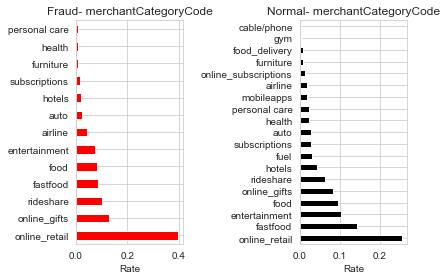

In [48]:
plt.subplot(1,2,1)

fraud.merchantCategoryCode.value_counts(normalize=True).plot(kind='barh',color='r')
plt.xlabel('Rate')
plt.title('Fraud- merchantCategoryCode')

plt.subplot(1,2,2)

norm.merchantCategoryCode.value_counts(normalize=True).plot(kind='barh',color='k')
plt.xlabel('Rate')

plt.title('Normal- merchantCategoryCode')

plt.tight_layout()

No fraud merchant codes : ['cable/phone' 'food_delivery' 'fuel' 'gym' 'mobileapps'
 'online_subscriptions']


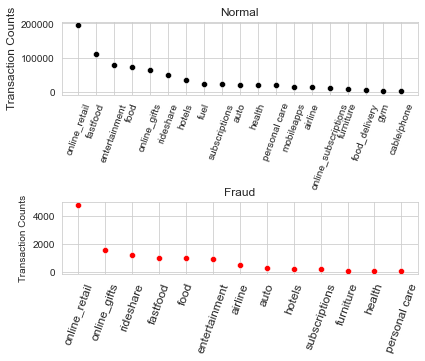

In [49]:
print('No fraud merchant codes : '+format(np.setdiff1d(norm.merchantCategoryCode.unique(),fraud.merchantCategoryCode.unique())))

plt.subplot(2,1,1)
sns.scatterplot(x=norm.merchantCategoryCode.value_counts().index,y=norm.merchantCategoryCode.value_counts(),color='k')
plt.xticks(rotation=70)
plt.title('Normal')
plt.ylabel('Transaction Counts',fontsize=12)

plt.tight_layout()

plt.subplot(2,1,2)
sns.scatterplot(x=fraud.merchantCategoryCode.value_counts().index,y=fraud.merchantCategoryCode.value_counts(),color='r')
plt.xticks(rotation=70,fontsize=12)
plt.title('Fraud')
plt.ylabel('Transaction Counts')


plt.show()



In [50]:
#Change the merchant codes where no fraud occured to 'Other'

other=['cable/phone','food_delivery','fuel', 'gym', 'mobileapps',
 'online_subscriptions']

df.merchantCategoryCode = df.merchantCategoryCode.map(lambda x:'Other' if x in other else x)

# acqCountry

Almost all transactions were made in US

In [51]:
#create function to plot with percentage

def count_with_percent(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)

C:\Users\vtou2\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


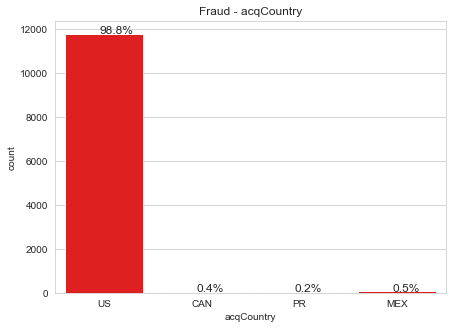

In [52]:
plt.figure(figsize = (7,5))
ax=sns.countplot('acqCountry',data=fraud,color='r')

count_with_percent(ax,fraud.acqCountry)

plt.title('Fraud - acqCountry')

plt.show()

C:\Users\vtou2\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


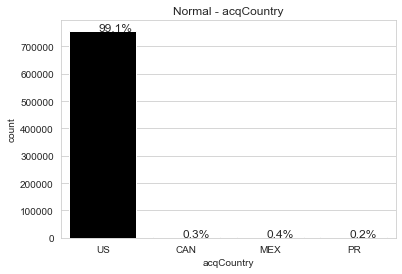

In [53]:
ax=sns.countplot('acqCountry',data=norm,color='k')

count_with_percent(ax,norm.acqCountry)

plt.title('Normal - acqCountry')

plt.show()

# posEntryMode

There noticable some differences in posEntryMode used between fraud and normal transactions

(([<matplotlib.lines.Line2D at 0x17d40b2a070>], Text(0, 0.5, 'CDF')),
 ([<matplotlib.lines.Line2D at 0x17d40b2a400>], Text(0, 0.5, 'CDF')),
 <matplotlib.legend.Legend at 0x17d40b1edf0>)

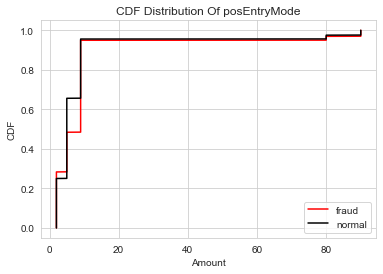

In [54]:
both_cdf(fraud.posEntryMode,norm.posEntryMode)

<ipython-input-55-23bd8a4dff6c>:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(sizes,  labels=labels,
<ipython-input-55-23bd8a4dff6c>:20: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(sizes2,labels=labels,


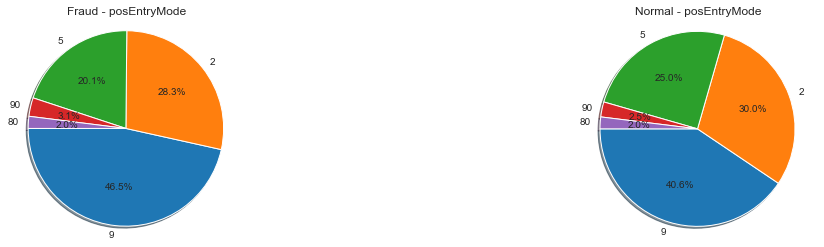

In [55]:
plt.subplot(1,3,1)


labels = '9','2','5','90','80'
sizes= [np.array([fraud.posEntryMode.value_counts()/len(fraud)*100])]


plt.pie(sizes,  labels=labels,
autopct='%1.1f%%', shadow=True, startangle=180)

plt.title('Fraud - posEntryMode')
plt.axis('equal')

plt.subplot(1,3,3)


sizes2= [np.array([norm.posEntryMode.value_counts()/len(norm)*100])]


plt.pie(sizes2,labels=labels,
autopct='%1.1f%%', shadow=True, startangle=180)

plt.title('Normal - posEntryMode')
plt.axis('equal')

plt.subplots_adjust(right=2)

plt.show()

# posConditionCode

posConditionCode also have some differences

(([<matplotlib.lines.Line2D at 0x17d3f076ee0>], Text(0, 0.5, 'CDF')),
 ([<matplotlib.lines.Line2D at 0x17d3f076310>], Text(0, 0.5, 'CDF')),
 <matplotlib.legend.Legend at 0x17d3f04d280>)

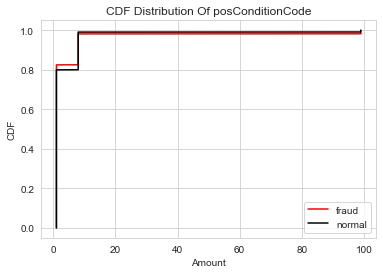

In [56]:
both_cdf(fraud.posConditionCode,norm.posConditionCode)

<ipython-input-57-d9caa9cd49e0>:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(sizes,  labels=labels,
<ipython-input-57-d9caa9cd49e0>:20: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(sizes2,labels=labels,


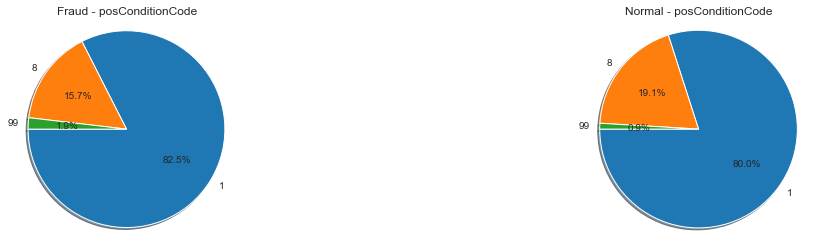

In [57]:
plt.subplot(1,3,1)


labels = '1','8','99'
sizes= [np.array([fraud.posConditionCode.value_counts()/len(fraud)*100])]


plt.pie(sizes,  labels=labels,
autopct='%1.1f%%', shadow=True, startangle=180)

plt.title('Fraud - posConditionCode')
plt.axis('equal')

plt.subplot(1,3,3)


sizes2= [np.array([norm.posConditionCode.value_counts()/len(norm)*100])]


plt.pie(sizes2,labels=labels,
autopct='%1.1f%%', shadow=True, startangle=180)

plt.title('Normal - posConditionCode')
plt.axis('equal')

plt.subplots_adjust(right=2)

plt.show()

# accountOpenDate & dateOfLastAddressChange

Look at accountOpenDate & dateOfLastAddressChange together.  Independently, they are unique and doesn't affect the cause of fraud much, but together we could create a new feature for if they changed their address at least once or have never changed it at all.

<ipython-input-58-8e3a86a28356>:11: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(sizes,  labels=labels,
<ipython-input-58-8e3a86a28356>:23: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(sizes2,labels=labels,


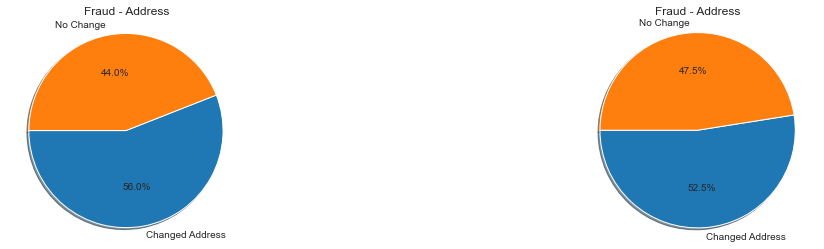

In [58]:
fraud_changed_address = fraud[fraud.accountOpenDate!=fraud.dateOfLastAddressChange] 
normal_changed_address = norm[norm.accountOpenDate!=norm.dateOfLastAddressChange]

plt.subplot(1,3,1)


labels = 'Changed Address','No Change'
sizes= [np.array([len(fraud_changed_address)/len(fraud),1-len(fraud_changed_address)/len(fraud)])]


plt.pie(sizes,  labels=labels,
autopct='%1.1f%%', shadow=True, startangle=180)

plt.title('Fraud - Address')
plt.axis('equal')

plt.subplot(1,3,3)


sizes2= [np.array([len(normal_changed_address)/len(norm),1-len(normal_changed_address)/len(norm)])]


plt.pie(sizes2,labels=labels,
autopct='%1.1f%%', shadow=True, startangle=180)

plt.title('Fraud - Address')
plt.axis('equal')

plt.subplots_adjust(right=2)

plt.show()

In [59]:
#Create feature where 0 if there was no address changes, 1 if address changed at least once

df['changedAddress'] = np.where(df.accountOpenDate!=df.dateOfLastAddressChange,1,0)

In [60]:
#Turn these dates to numerical by turning them into their ordinal numbers

df['accountOpenDate'] = df['accountOpenDate'].map(lambda x:x.toordinal())

df['dateOfLastAddressChange'] = df['dateOfLastAddressChange'].map(lambda x:x.toordinal())


# currentExpDate

Surprisingly, there are only 165 unique currentExpDate between 4992 customers.  Lets preserve the information by encoding it in different numerical labels.

In [61]:
df.currentExpDate.value_counts()

2024-08-01    5035
2029-03-01    5035
2023-10-01    5028
2027-05-01    5006
2021-01-01    4979
              ... 
2033-02-01    4223
2029-02-01    4210
2026-02-01    4184
2019-12-01    3975
2033-08-01    1850
Name: currentExpDate, Length: 165, dtype: int64

In [62]:
len(df.customerId.unique())

4992

In [63]:
len(df.currentExpDate.unique())

165

In [64]:
#Apply LabelEncoder

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

df['encoded_currentExpDate'] = pd.Series(LE.fit_transform(df.currentExpDate))

In [65]:
#Drop currentExpDate

df.drop(columns=['currentExpDate'],inplace=True)

# cardLast4Digits

There are 77367 unique cards used by 4992 customers.  So some customers have more than one card.

In [66]:
len(df.groupby(['customerId','cardLast4Digits']).cardLast4Digits.unique())

7367

Create new feature for how many cards total does each customer have

In [67]:
#First find the counts of unique card for each customer
counts = df.groupby(['customerId'])['cardLast4Digits'].unique().transform(lambda x:len(x)).to_frame()

#merge with original df
df = df.merge(counts,on='customerId',suffixes=('','_counts'))

Although distribution is similar, no one with 6 cards had any fraud transactions

In [68]:
#update

fraud=df[df.isFraud==1]
norm=df[df.isFraud==0]

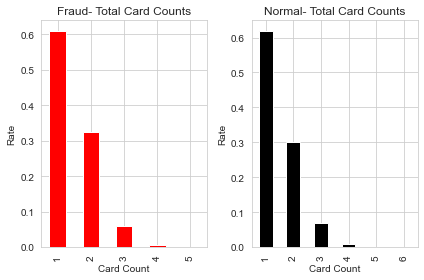

In [69]:
plt.subplot(1,2,1)

fraud.cardLast4Digits_counts.value_counts(normalize=True).plot(kind='bar',color='r')
plt.xlabel('Card Count')
plt.ylabel('Rate')
plt.title('Fraud- Total Card Counts')


plt.subplot(1,2,2)

norm.cardLast4Digits_counts.value_counts(normalize=True).plot(kind='bar',color='k')
plt.xlabel('Card Count')
plt.ylabel('Rate')
plt.title('Normal- Total Card Counts')

plt.tight_layout()

plt.show()

Now preserve the information of cardLast4Digits by applying LabelEncoder then dropping the original 

In [70]:
df['encoded_cardLast4Digits'] = pd.Series(LE.fit_transform(df.cardLast4Digits))

df.drop(columns=['cardLast4Digits'],inplace=True)

# Summary of EDA Process

- Dropped customers that had more than 30% of all their transactions as fraud


- Created new features from transactionDateTime and visualized the distributions of each


- Created a feature for the time since last transaction based on each customerId


- transactionAmount had big difference in fraud vs. normal transactions, so a few new features were created from that


- Fixed the formats of merchantName to allow better understanding of where fraudulent transaction occurred overall.  Then kept only the top names where fraud occurred. (36 out of 173). The rest were turned to "Other"


- Located where no fraudulent transactions occurred in merchantCategoryCode and turned those labels to "Other"


- Created a feature to see if the customer ever had an address change


- Preserved useful, but large unique value counts, by applying LabelEncoder

**Before EDA:** 776,613 rows and 20 columns\
**After EDA:** 776,491 rows and 42 columns

We've now created some useful features from all the object features that will help the model predict better

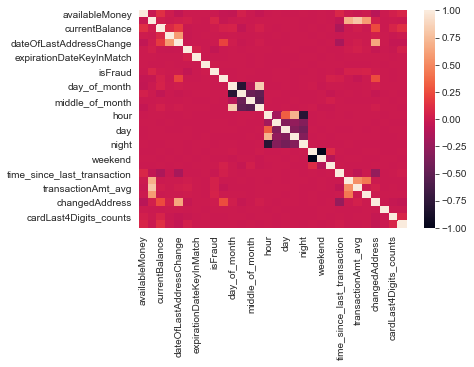

In [71]:
sns.heatmap(df.corr())

# What Next?

It is time to put this data set into predictive models and interpret the findings. 

In [72]:
datapath = '../CC_Fraud'
save_file(df, 'EDA.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)y
Writing file.  "../CC_Fraud\EDA.csv"
